In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zot_df = pd.read_csv('zot_clean2.csv')

# Convert the date columns to datetime objects
date_columns = ["Date", "Date Added", "Date Modified"]
for col in date_columns:
    zot_df[col] = pd.to_datetime(zot_df[col], errors='coerce')

zot_df["Publication Year"] = zot_df["Publication Year"].astype("Int64")
zot_df["Hearts"] = zot_df["Hearts"].astype("Int64")

zot_df["Manual Tags"] = zot_df["Manual Tags"].fillna("").str.split(";").apply(lambda tags: [tag.strip() for tag in tags])
zot_df["Common Tags"] = zot_df["Common Tags"].fillna("").str.split(";").apply(lambda tags: [tag.strip() for tag in tags])

zot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Type          719 non-null    object        
 1   Publication Year   719 non-null    Int64         
 2   Author             656 non-null    object        
 3   Title              719 non-null    object        
 4   Publication Title  279 non-null    object        
 5   DOI                215 non-null    object        
 6   Url                651 non-null    object        
 7   Abstract Note      677 non-null    object        
 8   Date               63 non-null     datetime64[ns]
 9   Date Added         719 non-null    datetime64[ns]
 10  Date Modified      719 non-null    datetime64[ns]
 11  Volume             205 non-null    float64       
 12  Publisher          325 non-null    object        
 13  Language           584 non-null    object        
 14  Library Ca

In [2]:
zot_df.head()

,Item Type,Publication Year,Author,Title,Publication Title,DOI,Url,Abstract Note,Date,Date Added,Date Modified,Volume,Publisher,Language,Library Catalog,Notes,Manual Tags,Hearts,Common Tags
0,report,2009,"Settles, Burr",Active Learning Literature Survey,NaN,NaN,https://minds.wisconsin.edu/handle/1793/60660,The key idea behind active learning is that a ...,2009-01-01,2022-09-17 13:55:35,2024-07-28 20:21:19,NaN,University of Wisconsin-Madison Department of ...,en,minds.wisconsin.edu,NaN,"[active learning, machine learning]",1,[machine learning]
1,preprint,2020,"Baier, Lucas; Kellner, Vincent; Kühl, Niklas; ...",Switching Scheme: A Novel Approach for Handlin...,NaN,NaN,http://arxiv.org/abs/2011.02738,Machine learning models nowadays play a crucia...,NaT,2022-09-17 15:26:45,2024-07-28 20:21:29,NaN,arXiv,en,arXiv.org,Comment: 54th Annual Hawaii International Conf...,[machine learning],1,[machine learning]
2,preprint,2022,"Mayaki, Mansour Zoubeirou A.; Riveill, Michel",Autoregressive based Drift Detection Method,NaN,NaN,http://arxiv.org/abs/2203.04769,"In the classic machine learning framework, mod...",NaT,2022-09-17 15:33:30,2024-07-28 20:21:32,NaN,arXiv,en,arXiv.org,NaN,[machine learning],1,[machine learning]
3,journalArticle,2009,"Sabelfeld, K.; Mozartova, N.",Sparsified Randomization Algorithms for large ...,Monte Carlo Methods and Applications,10.1515/MCMA.2009.015,https://www.degruyter.com/document/doi/10.1515...,Sparsiﬁed Randomization Monte Carlo (SRMC) alg...,NaT,2022-09-17 17:35:35,2024-07-28 20:30:28,15.0,NaN,en,DOI.org (Crossref),"<div data-schema-version=""8""><p>Inspiration fo...","[monte carlo, linear systems, random linear al...",3,"[monte carlo, linear systems, random linear al..."
4,journalArticle,2017,"Benzi, Michele; Evans, Thomas M.; Hamilton, St...",Analysis of Monte Carlo accelerated iterative ...,Numerical Linear Algebra with Applications,10.1002/nla.2088,https://onlinelibrary.wiley.com/doi/10.1002/nl...,We consider hybrid deterministic-stochastic it...,NaT,2022-09-17 17:35:37,2024-07-28 20:24:15,24.0,NaN,en,DOI.org (Crossref),NaN,"[monte carlo, linear systems, random linear al...",1,"[monte carlo, linear systems, random linear al..."


<Axes: >

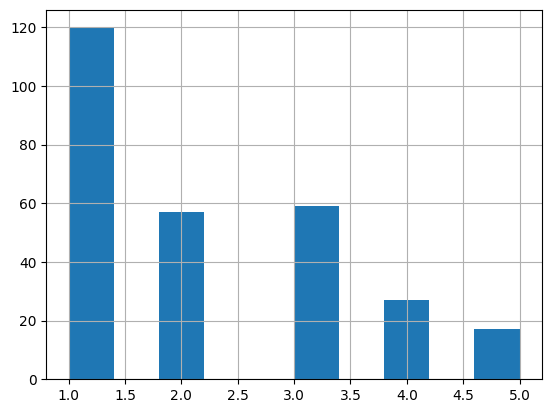

In [3]:
zot_df["Hearts"].hist()

In [4]:
import pandas as pd

def visualize_date(df, date_column):
	"""
	Visualizes the distribution of dates in the specified column of the DataFrame.
	
	Parameters:
	df (pd.DataFrame): The DataFrame containing the date column.
	date_column (str): The name of the column containing date values.
	"""
	# Ensure the date column is in datetime format
	df[date_column] = pd.to_datetime(df[date_column])
	
	# Plot the data
	plt.figure(figsize=(10, 6))
	plt.hist(df[date_column], bins=30, edgecolor='k', alpha=0.7)
	plt.title('Distribution of ' + date_column)
	plt.xlabel(date_column)
	plt.ylabel('Frequency')
	plt.xticks(rotation=45)
	plt.show()


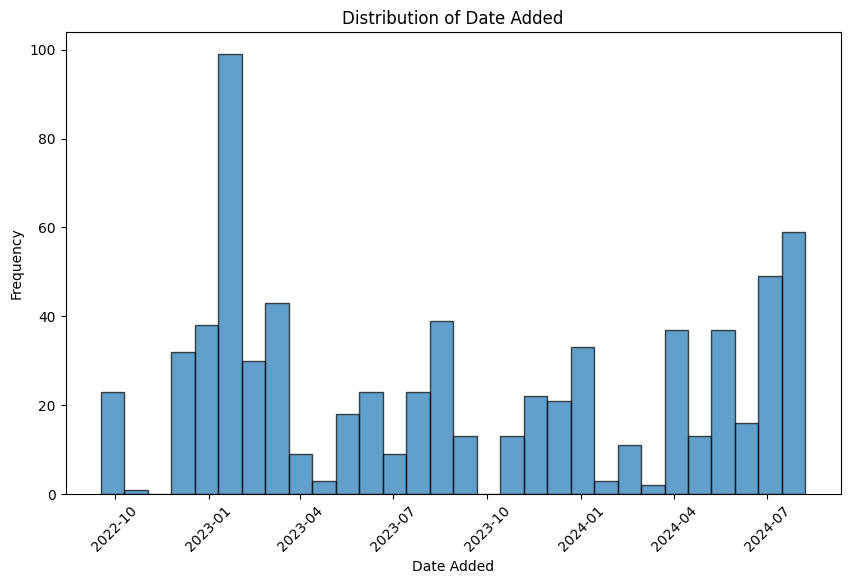

In [5]:
visualize_date(zot_df, "Date Added")

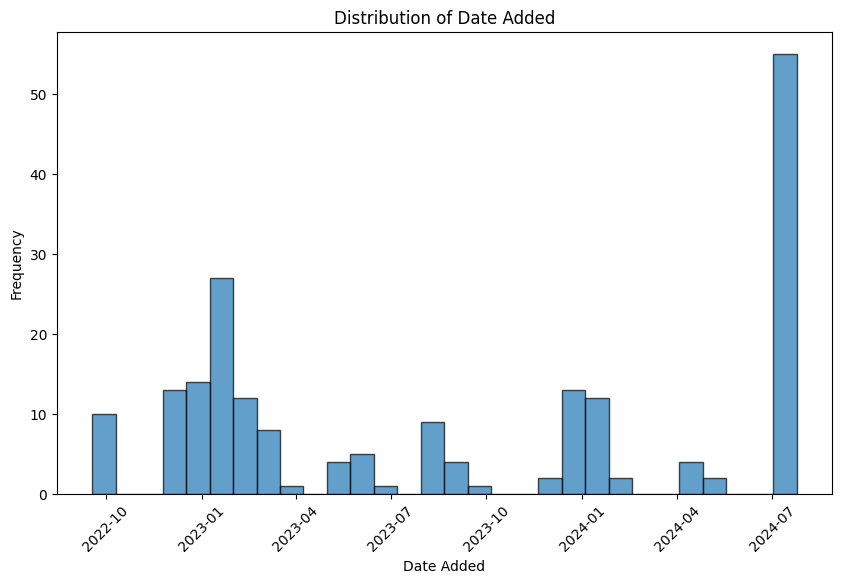

In [6]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "monte carlo" in tags)].copy(), "Date Added")

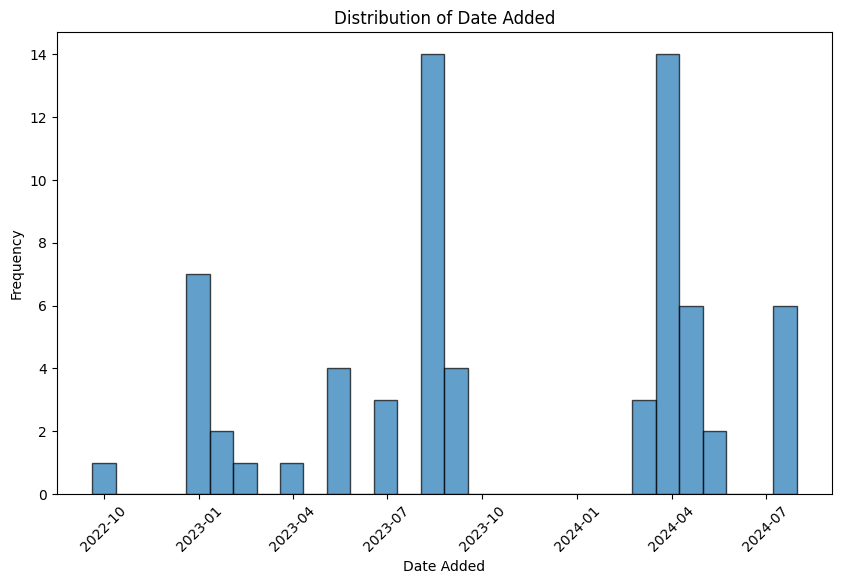

In [7]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "deep learning" in tags)].copy(), "Date Added")

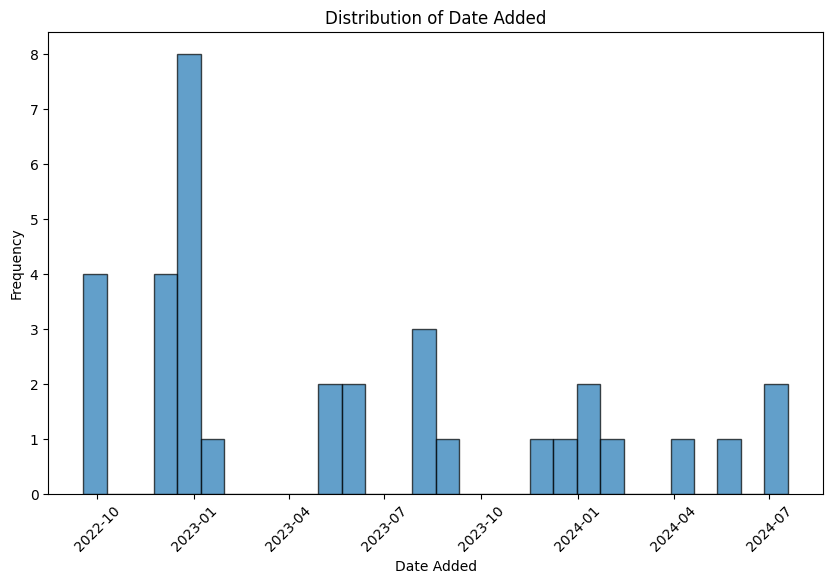

In [8]:
visualize_date(zot_df.loc[zot_df["Manual Tags"].apply(lambda tags: "walk on spheres" in tags)].copy(), "Date Added")

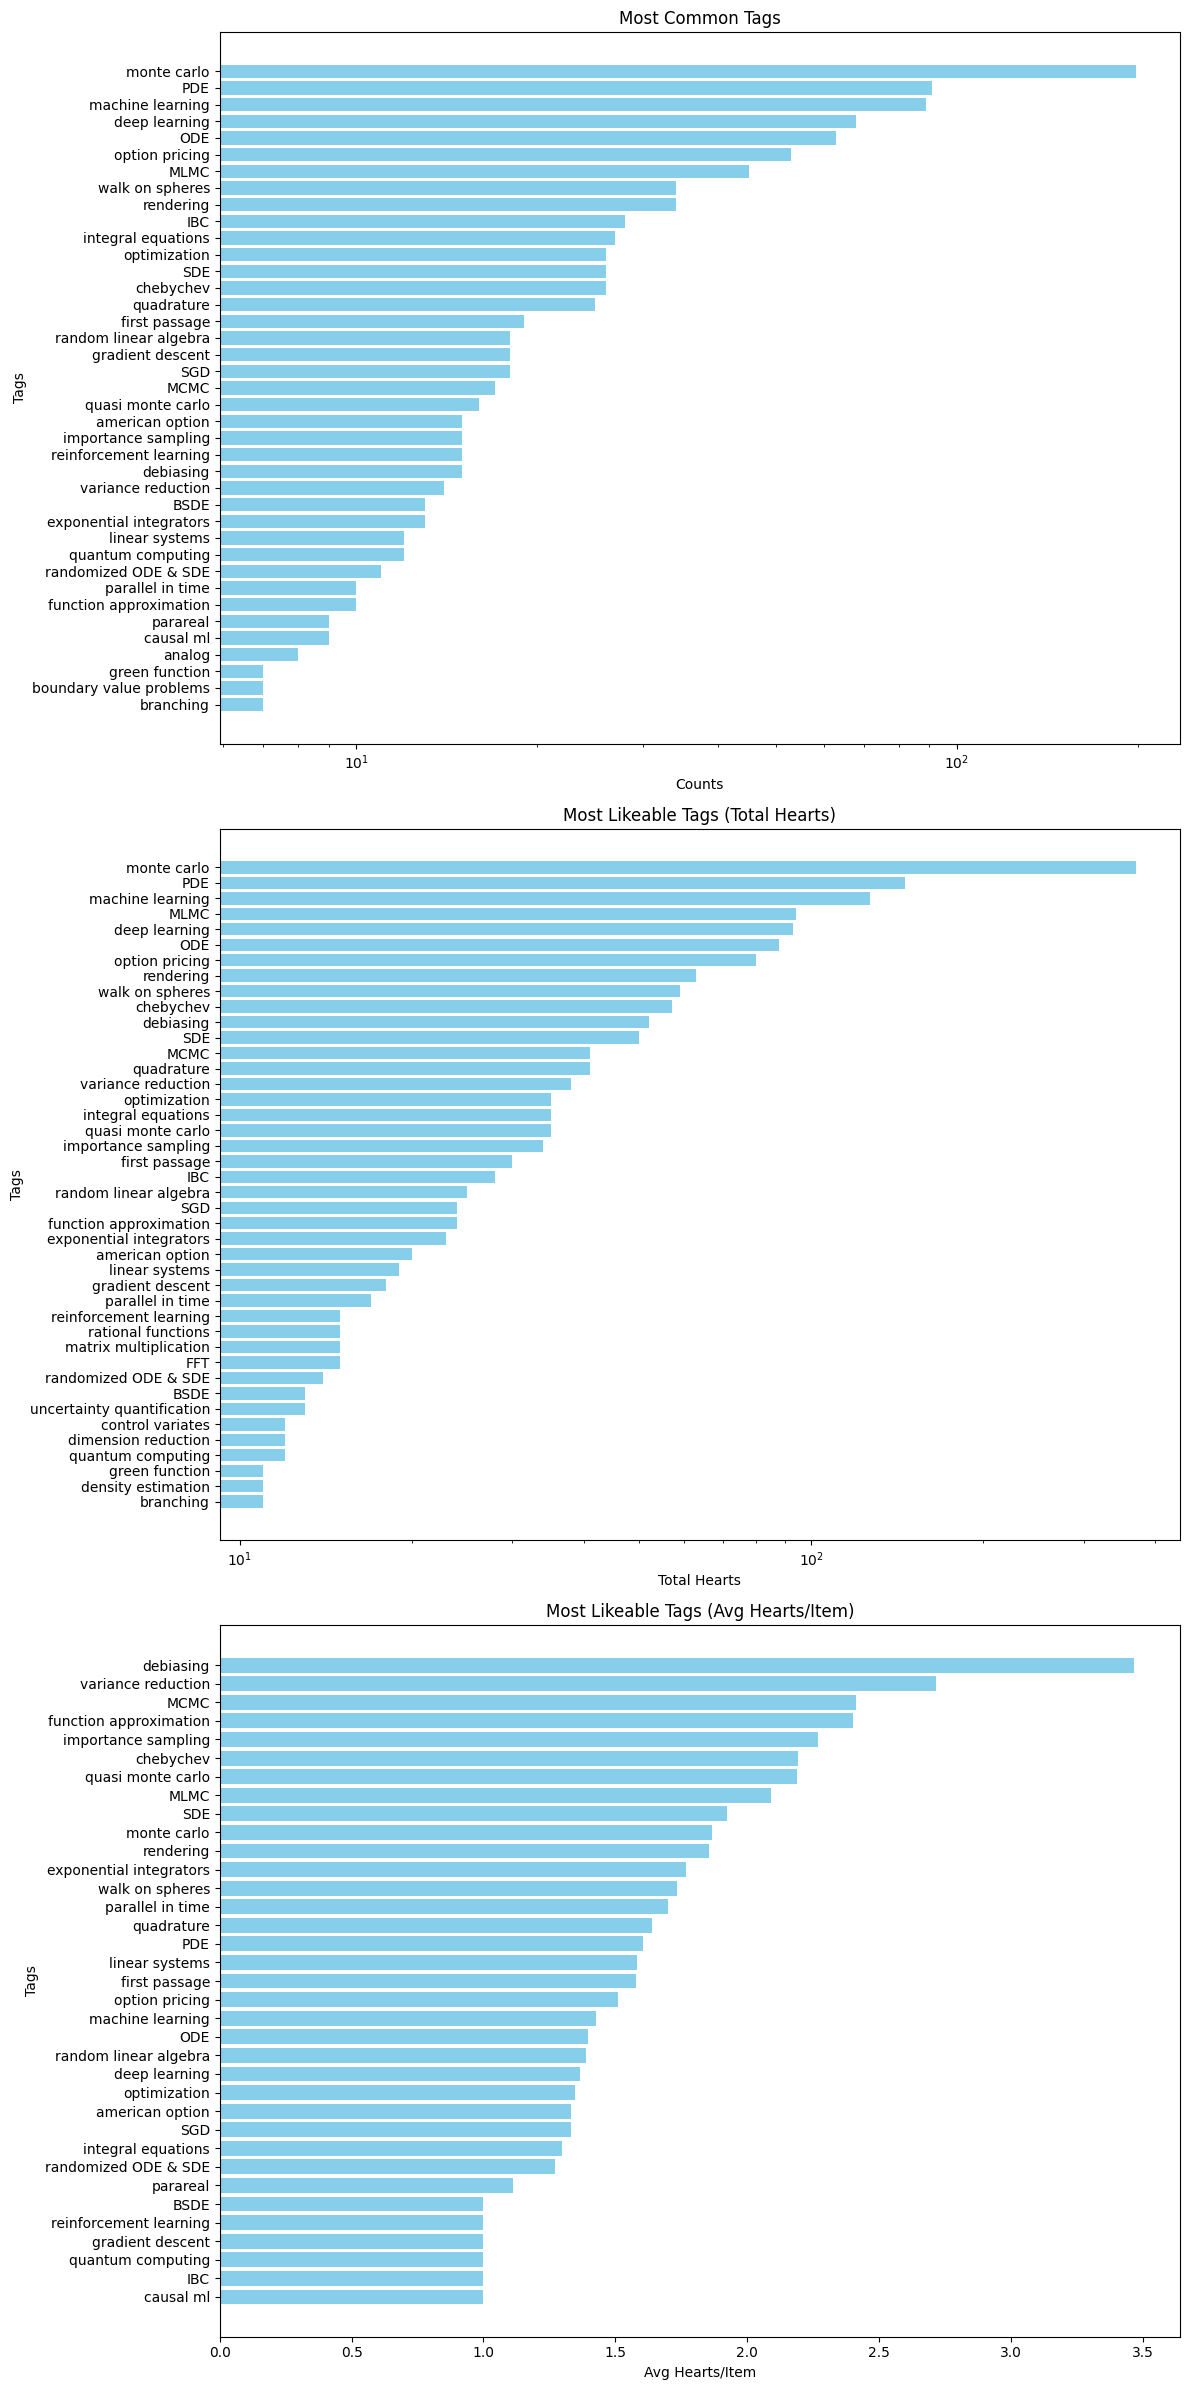

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the list of tags
all_tags = [tag for sublist in zot_df["Manual Tags"] for tag in sublist if tag != ""]

# Count the occurrences of each tag
tag_counts = Counter(all_tags)

total_tags = sum(tag_counts.values())

# Filter out tags that are less than 0.5% of the total
filtered_tag_counts = {tag: count for tag, count in tag_counts.items() if count / total_tags >= 0.005}

# Sort the tags by frequency
sorted_tag_counts = dict(sorted(filtered_tag_counts.items(), key=lambda item: item[1], reverse=True))

# Create a figure with 3 subplots
plt.figure(figsize=(12, 24))

# First subplot: Most Common Tags
plt.subplot(3, 1, 1)
plt.barh(list(sorted_tag_counts.keys())[::-1], list(sorted_tag_counts.values())[::-1], color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Tags')
plt.title('Most Common Tags')
plt.xscale('log')
plt.tight_layout()

# Flatten the list of tags and their corresponding hearts
all_tags_with_hearts = [(tag, hearts) for tags, hearts in zip(zot_df["Manual Tags"], zot_df["Hearts"].fillna(1)) for tag in tags if tag != ""]


# Count the occurrences of each tag, weighted by the number of hearts
tag_counts_with_hearts = Counter()
for tag, hearts in all_tags_with_hearts:
    if tag in tag_counts_with_hearts.keys():
        tag_counts_with_hearts[tag] += hearts
    else:
        tag_counts_with_hearts[tag] = hearts

total_tags_with_hearts = sum(tag_counts_with_hearts.values())

# Filter out tags that are less than 0.5% of the total
filtered_tag_counts_with_hearts = {tag: count for tag, count in tag_counts_with_hearts.items() if count / total_tags_with_hearts >= 0.005}

# Sort the tags by frequency
sorted_tag_counts_with_hearts = dict(sorted(filtered_tag_counts_with_hearts.items(), key=lambda item: item[1], reverse=True))

# Second subplot: Most Likeable Tags (Total Hearts)
plt.subplot(3, 1, 2)
plt.barh(list(sorted_tag_counts_with_hearts.keys())[::-1], list(sorted_tag_counts_with_hearts.values())[::-1], color='skyblue')
plt.xlabel('Total Hearts')
plt.ylabel('Tags')
plt.title('Most Likeable Tags (Total Hearts)')
plt.xscale('log')
plt.tight_layout()

# Flatten the list of tags and their corresponding hearts
all_tags = [(tag, hearts) for tags, hearts in zip(zot_df["Manual Tags"], zot_df["Hearts"].fillna(1)) for tag in tags if tag != ""]

# Count the occurrences of each tag
tag_counts = Counter(tag for tag, _ in all_tags)

# Sum the hearts for each tag
tag_hearts = Counter()
for tag, hearts in all_tags:
    if tag in tag_hearts.keys():
        tag_hearts[tag] += hearts
    else:
        tag_hearts[tag] = hearts

# Divide the total hearts by the frequency of each tag
weighted_tag_counts = {tag: tag_hearts[tag] / count for tag, count in tag_counts.items() if count >= 9}

# Filter out tags that are less than 0.5% of the total
avg_weighted_tags = sum(weighted_tag_counts.values()) / len(weighted_tag_counts)
filtered_tag_counts = {tag: wcount for tag, wcount in weighted_tag_counts.items() if wcount >= 0.6 * avg_weighted_tags}

# Sort the tags by frequency
sorted_tag_counts = dict(sorted(filtered_tag_counts.items(), key=lambda item: item[1], reverse=True))

# Third subplot: Most Likeable Tags (Avg Hearts/Item)
plt.subplot(3, 1, 3)
plt.barh(list(sorted_tag_counts.keys())[::-1], list(sorted_tag_counts.values())[::-1], color='skyblue')
plt.xlabel('Avg Hearts/Item')
plt.ylabel('Tags')
plt.title('Most Likeable Tags (Avg Hearts/Item)')
plt.tight_layout()

plt.show()

In [12]:
tags_df = zot_df["Manual Tags"].apply(lambda tags: pd.Series(1, index=tags)).fillna(0)
zot_pac5 = pd.read_csv('zot_pac5.csv',index_col=0)
result = np.einsum("ki,kj->ij", tags_df.values, zot_pac5.values)

print(tags_df.shape)
print(result.shape)

(719, 105)
(105, 2)


In [13]:
import pacmap
import thisnotthat as tnt
import panel as pn
from collections import Counter

# Flatten the list of tags and their corresponding hearts
all_tags = [(tag, hearts) for tags, hearts in zip(zot_df["Manual Tags"], zot_df["Hearts"].fillna(1)) for tag in tags if tag != ""]

# Count the occurrences of each tag
tag_counts = Counter(tag for tag, _ in all_tags)

# Sum the hearts for each tag
tag_hearts = Counter()
for tag, hearts in all_tags:
    if tag in tag_hearts.keys():
        tag_hearts[tag] += hearts
    else:
        tag_hearts[tag] = hearts

# Divide the total hearts by the frequency of each tag
weighted_tag_counts = {tag: tag_hearts[tag] / count for tag, count in tag_counts.items()}


# Assuming tags_df is already defined and is a DataFrame
# Transpose the DataFrame

tags_df = zot_df["Manual Tags"].apply(lambda tags: pd.Series(1, index=tags)).fillna(0)
tags_df = tags_df.drop(columns=[""]).T



# Initialize PaCMAP
pac5 = pacmap.PaCMAP(
    n_components=2,
    n_neighbors=3,
    MN_ratio=0.5,
    FP_ratio=2.0,
    distance="angular",
    random_state=3)

# Fit and transform the data
X_transformed = pac5.fit_transform(result.T)


# Create an interactive plot using plotly
panel = tnt.BokehPlotPane(
    X_transformed,
    hover_text=tags_df.index,
    marker_size=[weighted_tag_counts[tag]/15 for tag in tags_df.index], 
    # marker_size=[tag_counts[tag]/15 for tag in tags_df.index], 
    show_legend=False,
    legend_location="top_right",
    sizing_mode='stretch_both',
    min_point_size=0.001,
    max_point_size=0.05,
)

# Show the panel
pn.serve(panel)

d:\program_files\miniconda\envs\zoteromap\Lib\site-packages\pacmap\pacmap.py:822: UserWarning: Warning: random state is set to 3
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')
d:\program_files\miniconda\envs\zoteromap\Lib\site-packages\pacmap\pacmap.py:889: UserWarning: Sample size is smaller than n_neighbors. n_neighbors will be reduced.
  warnings.warn("Sample size is smaller than n_neighbors. n_neighbors will be reduced.")
d:\program_files\miniconda\envs\zoteromap\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\program_files\miniconda\envs\zoteromap\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
